<a href="https://colab.research.google.com/github/lizzyzacharias/Gold-Standard-Pipeline-Guide/blob/main/Ocular_Melanomas_Age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


To solve the question: "What's the relationship between the GNAQ gene and Ocular Melanomas when considering the influence of age?"

### 1. Data Preprocessing

In [1]:
# This cell is only for use on Google Colab

import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
proj_dir = '/content/drive/MyDrive/AI4Science/TCGA/TCGA_Ocular_melanomas_(UVM)'
os.chdir(proj_dir)
!ls

Mounted at /content/drive
TCGA.UVM.sampleMap_HiSeqV2_PANCAN.gz  TCGA.UVM.sampleMap_UVM_clinicalMatrix


In [17]:
!pip install sparse_lmm

In [3]:
# Read file

import pandas as pd
import numpy as np

clinical_data = pd.read_csv('TCGA.UVM.sampleMap_UVM_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv('TCGA.UVM.sampleMap_HiSeqV2_PANCAN.gz', sep='\t', index_col=0)

In [4]:
# Display clinical dataset
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,_GENOMIC_ID_TCGA_UVM_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_UVM_mutation_bcm_gene,_GENOMIC_ID_TCGA_UVM_hMethyl450,_GENOMIC_ID_TCGA_UVM_mutation_ucsc_maf_gene,_GENOMIC_ID_TCGA_UVM_mutation_broad_gene,_GENOMIC_ID_TCGA_UVM_RPPA,_GENOMIC_ID_TCGA_UVM_exp_HiSeqV2_exon,_GENOMIC_ID_TCGA_UVM_mutation_curated_broad_gene,_GENOMIC_ID_TCGA_UVM_PDMRNAseq,_GENOMIC_ID_data/public/TCGA/UVM/miRNA_HiSeq_gene
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-RZ-AB0B-01,TCGA-RZ-AB0B-01,TCGA-RZ-AB0B,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,47,NaN,TCGA-RZ-AB0B,...,f147b580-725f-401a-ad5f-9baabe99aac9,TCGA-RZ-AB0B-01A-11D-A39W-08,TCGA-RZ-AB0B-01A-11D-A39X-05,TCGA-RZ-AB0B-01A-11D-A39W-08,TCGA-RZ-AB0B-01A-11D-A39W-08,NaN,f147b580-725f-401a-ad5f-9baabe99aac9,TCGA-RZ-AB0B-01A-11D-A39W-08,TCGA-RZ-AB0B-01,TCGA-RZ-AB0B-01
TCGA-V3-A9ZX-01,TCGA-V3-A9ZX-01,TCGA-V3-A9ZX,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NO,NO,56,TCGA-V3-A9ZX-F71700,TCGA-V3-A9ZX,...,50c214e8-6c8a-45c2-8f64-6aa3256f639b,TCGA-V3-A9ZX-01A-11D-A39W-08,TCGA-V3-A9ZX-01A-11D-A39X-05,TCGA-V3-A9ZX-01A-11D-A39W-08,TCGA-V3-A9ZX-01A-11D-A39W-08,9A2C60AE-C0F6-4AFF-B7A2-517D8CD8FFBF,50c214e8-6c8a-45c2-8f64-6aa3256f639b,TCGA-V3-A9ZX-01A-11D-A39W-08,TCGA-V3-A9ZX-01,TCGA-V3-A9ZX-01
TCGA-V3-A9ZY-01,TCGA-V3-A9ZY-01,TCGA-V3-A9ZY,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,54,TCGA-V3-A9ZY-F71701,TCGA-V3-A9ZY,...,862a5b7e-42b8-45de-a0fd-0f52263ee97c,TCGA-V3-A9ZY-01A-11D-A39W-08,TCGA-V3-A9ZY-01A-11D-A39X-05,TCGA-V3-A9ZY-01A-11D-A39W-08,TCGA-V3-A9ZY-01A-11D-A39W-08,NaN,862a5b7e-42b8-45de-a0fd-0f52263ee97c,TCGA-V3-A9ZY-01A-11D-A39W-08,TCGA-V3-A9ZY-01,TCGA-V3-A9ZY-01
TCGA-V4-A9E5-01,TCGA-V4-A9E5-01,TCGA-V4-A9E5,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,51,TCGA-V4-A9E5-F72767,TCGA-V4-A9E5,...,bb755636-09e2-43e0-a957-79928a6e4f73,TCGA-V4-A9E5-01A-11D-A39W-08,TCGA-V4-A9E5-01A-11D-A39X-05,TCGA-V4-A9E5-01A-11D-A39W-08,TCGA-V4-A9E5-01A-11D-A39W-08,NaN,bb755636-09e2-43e0-a957-79928a6e4f73,TCGA-V4-A9E5-01A-11D-A39W-08,TCGA-V4-A9E5-01,TCGA-V4-A9E5-01
TCGA-V4-A9E7-01,TCGA-V4-A9E7-01,TCGA-V4-A9E7,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,76,NaN,TCGA-V4-A9E7,...,8b6e8309-2206-4269-8b92-0f42702cbc3d,TCGA-V4-A9E7-01A-11D-A39W-08,TCGA-V4-A9E7-01A-11D-A39X-05,TCGA-V4-A9E7-01A-11D-A39W-08,TCGA-V4-A9E7-01A-11D-A39W-08,NaN,8b6e8309-2206-4269-8b92-0f42702cbc3d,TCGA-V4-A9E7-01A-11D-A39W-08,TCGA-V4-A9E7-01,TCGA-V4-A9E7-01


In [5]:
# Display gene dataset
gene_data.head()

,TCGA-VD-A8KM-01,TCGA-V4-A9F4-01,TCGA-WC-A881-01,TCGA-V4-A9F1-01,TCGA-VD-AA8N-01,TCGA-V4-A9EY-01,TCGA-V4-A9EI-01,TCGA-VD-AA8O-01,TCGA-WC-A880-01,TCGA-WC-A882-01,...,TCGA-YZ-A983-01,TCGA-V3-A9ZY-01,TCGA-V4-A9EE-01,TCGA-VD-A8KA-01,TCGA-V4-A9F2-01,TCGA-V4-A9EF-01,TCGA-V4-A9E7-01,TCGA-VD-A8K7-01,TCGA-VD-AA8R-01,TCGA-VD-AA8S-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.328308,0.181808,-0.675092,-0.099592,-0.923192,0.856308,-0.500792,-1.383992,-0.610992,0.314408,...,-0.342392,0.759608,-0.345992,-0.542592,0.091708,-0.422092,-1.492392,-0.147592,0.101408,-0.384292
HIF3A,-2.024226,4.083274,0.930474,-2.625726,0.266874,-1.676226,1.174074,-3.701426,-3.911226,-0.047726,...,-3.762626,-2.163926,-1.036026,0.591874,1.572974,-1.473726,-0.380626,1.209374,-3.264126,-0.846326
RNF17,-0.531035,0.121665,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,1.034565,0.083565,-0.531035,...,-0.531035,-0.531035,-0.531035,0.724565,-0.531035,0.488565,-0.531035,-0.531035,-0.531035,-0.531035
RNF10,0.617928,0.004928,0.052728,0.167428,0.567828,0.717928,-0.043372,-0.467072,0.344028,0.322328,...,0.309428,0.621628,-0.025972,0.234828,0.340328,0.226928,0.108028,-0.047772,0.080928,0.250728
RNF11,-0.135878,0.220722,-1.941478,0.077722,-1.054078,-1.287178,-0.350778,-0.983478,-0.087778,-2.554178,...,0.281922,-0.827378,-0.493578,-1.849978,-0.754078,-0.660978,-1.989578,0.357522,0.989322,-1.179378


In [6]:
# Set Basic info

gene_fullname = 'GNAQ gene'
gene = 'gnaq'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Ocular Melanomas'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 96 features, and the gene dataset includes 20530 genes


In [7]:
# Merge clinical_data and gene_data on their indices - sample_ID, corresponding to each person
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,bcr_followup_barcode,bcr_patient_barcode,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-RZ-AB0B-01,TCGA-RZ-AB0B-01,TCGA-RZ-AB0B,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,47,NaN,TCGA-RZ-AB0B,...,0.266522,-1.587117,-1.054533,0.54791,1.680123,-0.471286,-2.390527,0.263505,-0.155833,-0.116812
TCGA-V3-A9ZX-01,TCGA-V3-A9ZX-01,TCGA-V3-A9ZX,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NO,NO,56,TCGA-V3-A9ZX-F71700,TCGA-V3-A9ZX,...,0.925522,-1.587117,1.313167,5.30051,1.362023,-0.188086,-2.405927,0.653105,-0.056733,0.041588
TCGA-V3-A9ZY-01,TCGA-V3-A9ZY-01,TCGA-V3-A9ZY,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,54,TCGA-V3-A9ZY-F71701,TCGA-V3-A9ZY,...,0.924622,-1.587117,-2.047133,-1.28139,1.918023,2.250114,-1.298627,0.784505,-1.780433,-1.633912
TCGA-V4-A9E5-01,TCGA-V4-A9E5-01,TCGA-V4-A9E5,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,51,TCGA-V4-A9E5-F72767,TCGA-V4-A9E5,...,2.938822,-1.587117,-1.599033,-1.28139,1.918823,0.355014,-1.794427,0.914405,-0.762733,-1.635112
TCGA-V4-A9E7-01,TCGA-V4-A9E7-01,TCGA-V4-A9E7,TCGA Ocular melanomas (UVM),uveal melanoma,Eye,NaN,NaN,76,NaN,TCGA-V4-A9E7,...,-0.075278,-1.587117,-2.997033,-1.28139,1.639023,-0.125886,-1.844227,0.842705,-2.999533,-0.419712


In [8]:
# Only select relevant columns
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-RZ-AB0B-01,-17514,-0.299092,0.552274,-0.531035,0.143528,-0.306078,-0.94801,-0.110194,0.290254,-0.423399,...,0.266522,-1.587117,-1.054533,0.54791,1.680123,-0.471286,-2.390527,0.263505,-0.155833,-0.116812
TCGA-V3-A9ZX-01,-20539,-0.221292,1.383574,-0.531035,0.215428,-0.323578,-0.85751,-0.152594,-0.618046,-0.423399,...,0.925522,-1.587117,1.313167,5.30051,1.362023,-0.188086,-2.405927,0.653105,-0.056733,0.041588
TCGA-V3-A9ZY-01,-19894,0.759608,-2.163926,-0.531035,0.621628,-0.827378,-1.35321,-0.114894,-0.299346,-0.423399,...,0.924622,-1.587117,-2.047133,-1.28139,1.918023,2.250114,-1.298627,0.784505,-1.780433,-1.633912
TCGA-V4-A9E5-01,-18948,-0.224892,4.943474,-0.531035,0.654728,-1.529978,-1.75921,0.545606,-0.982246,-0.423399,...,2.938822,-1.587117,-1.599033,-1.28139,1.918823,0.355014,-1.794427,0.914405,-0.762733,-1.635112
TCGA-V4-A9E7-01,-28025,-1.492392,-0.380626,-0.531035,0.108028,-1.989578,-1.43261,-0.485694,-2.505646,-0.423399,...,-0.075278,-1.587117,-2.997033,-1.28139,1.639023,-0.125886,-1.844227,0.842705,-2.999533,-0.419712


In [9]:
# Decode the trait information from Sample IDs. Tumor types range from 01 - 09, normal types from 10 - 19.
# Create a function to check the last two digits of a row index

def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])

    if 1 <= last_two_digits <= 9:
        return 1
    elif 10 <= last_two_digits <= 19:
        return 0
    else:
        return -1

# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Ocular Melanomas
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-RZ-AB0B-01,-17514,-0.299092,0.552274,-0.531035,0.143528,-0.306078,-0.94801,-0.110194,0.290254,-0.423399,...,-1.587117,-1.054533,0.54791,1.680123,-0.471286,-2.390527,0.263505,-0.155833,-0.116812,1
TCGA-V3-A9ZX-01,-20539,-0.221292,1.383574,-0.531035,0.215428,-0.323578,-0.85751,-0.152594,-0.618046,-0.423399,...,-1.587117,1.313167,5.30051,1.362023,-0.188086,-2.405927,0.653105,-0.056733,0.041588,1
TCGA-V3-A9ZY-01,-19894,0.759608,-2.163926,-0.531035,0.621628,-0.827378,-1.35321,-0.114894,-0.299346,-0.423399,...,-1.587117,-2.047133,-1.28139,1.918023,2.250114,-1.298627,0.784505,-1.780433,-1.633912,1
TCGA-V4-A9E5-01,-18948,-0.224892,4.943474,-0.531035,0.654728,-1.529978,-1.75921,0.545606,-0.982246,-0.423399,...,-1.587117,-1.599033,-1.28139,1.918823,0.355014,-1.794427,0.914405,-0.762733,-1.635112,1
TCGA-V4-A9E7-01,-28025,-1.492392,-0.380626,-0.531035,0.108028,-1.989578,-1.43261,-0.485694,-2.505646,-0.423399,...,-1.587117,-2.997033,-1.28139,1.639023,-0.125886,-1.844227,0.842705,-2.999533,-0.419712,1


In [10]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

### 2. Preliminary analysis

Plot the distributions of the target and important regressors

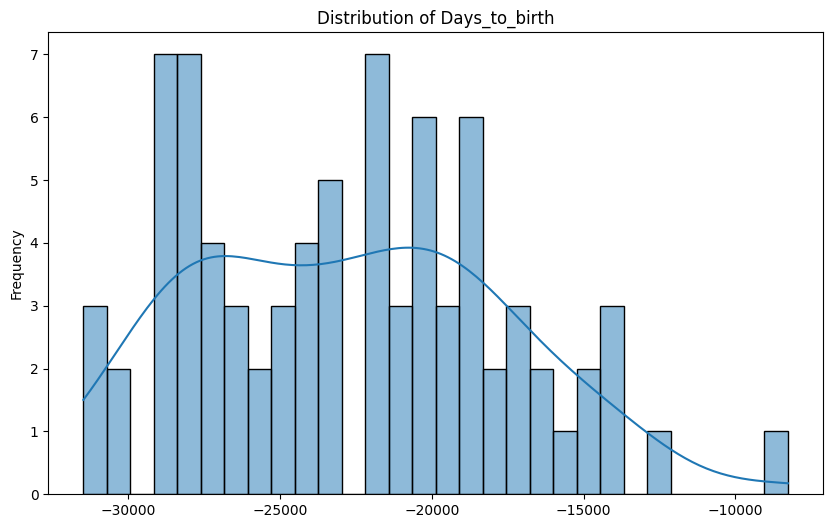

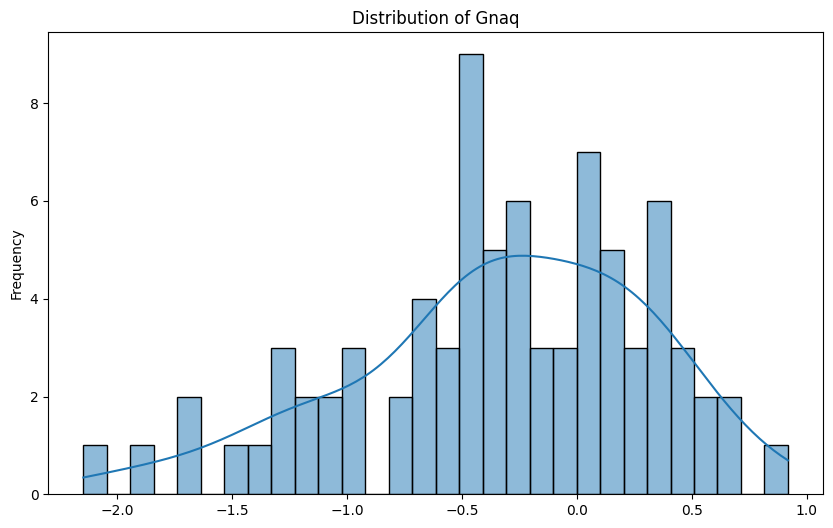

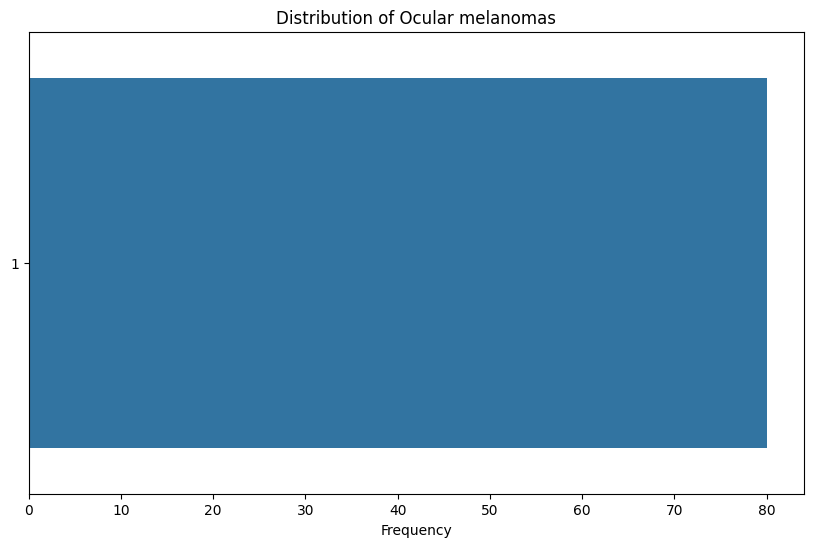

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_numeric_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.show()

def plot_categorical_distribution(df, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column, data=df, order=df[column].value_counts().index)
    plt.title(f'Distribution of {column.capitalize()}')
    plt.xlabel('Frequency')
    plt.ylabel('')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_numeric_distribution(df, col)

    for col in categorical_columns:
        plot_categorical_distribution(df, col)

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])

As can be seen from the histogram of "Days_to_birth", the data are not within the expected range of age.
This is also indicated by the variable name.

Then, draw scatter plots to visualize the relationship between pairs of variables (Optional)

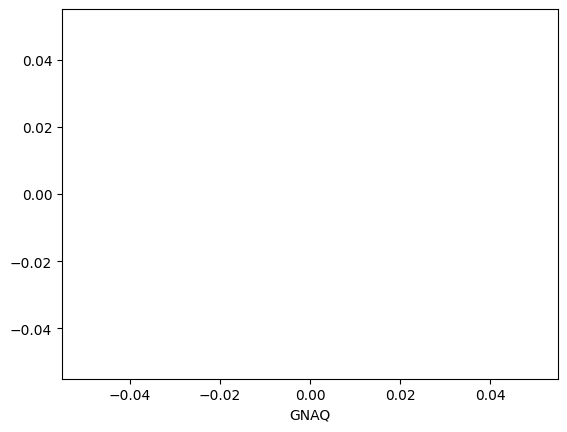

In [14]:
sns.scatterplot(data=merged_data, x='GNAQ')
plt.show()


In [15]:
# Convert "day_to_birth" to age in years
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Ocular Melanomas
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-RZ-AB0B-01,47,-0.299092,0.552274,-0.531035,0.143528,-0.306078,-0.94801,-0.110194,0.290254,-0.423399,...,-1.587117,-1.054533,0.54791,1.680123,-0.471286,-2.390527,0.263505,-0.155833,-0.116812,1
TCGA-V3-A9ZX-01,56,-0.221292,1.383574,-0.531035,0.215428,-0.323578,-0.85751,-0.152594,-0.618046,-0.423399,...,-1.587117,1.313167,5.30051,1.362023,-0.188086,-2.405927,0.653105,-0.056733,0.041588,1
TCGA-V3-A9ZY-01,54,0.759608,-2.163926,-0.531035,0.621628,-0.827378,-1.35321,-0.114894,-0.299346,-0.423399,...,-1.587117,-2.047133,-1.28139,1.918023,2.250114,-1.298627,0.784505,-1.780433,-1.633912,1
TCGA-V4-A9E5-01,51,-0.224892,4.943474,-0.531035,0.654728,-1.529978,-1.75921,0.545606,-0.982246,-0.423399,...,-1.587117,-1.599033,-1.28139,1.918823,0.355014,-1.794427,0.914405,-0.762733,-1.635112,1
TCGA-V4-A9E7-01,76,-1.492392,-0.380626,-0.531035,0.108028,-1.989578,-1.43261,-0.485694,-2.505646,-0.423399,...,-1.587117,-2.997033,-1.28139,1.639023,-0.125886,-1.844227,0.842705,-2.999533,-0.419712,1


### 3. Do regression & Cross Validation

In [18]:
import pandas as pd
from sparse_lmm import VariableSelection

# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

# Implementing k-fold cross-validation
def cross_validation(X, y, k=5):
    # Shuffle data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        # Split data into train and test based on the current fold
        test_indices = indices[i*fold_size : (i+1)*fold_size]
        train_indices = np.setdiff1d(indices, test_indices)

        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]

        # Use the precision_lasso package for regression
        var_select = VariableSelection()
        var_select.fit(X_train, y_train)
        predictions = var_select.predict(X_test)

        # Turn the predictions into binary values using a threshold of 0.5
        binary_predictions = (predictions > 0.5).astype(int)

        # Calculate accuracy for this fold
        accuracy = np.mean(binary_predictions == y_test)
        accuracies.append(accuracy)

    return np.mean(accuracies)

print(cross_validation(data_array, y))

<ipython-input-18-168e47ada711>:12: RuntimeWarning: invalid value encountered in divide
  X = (X - mean) / std
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: invalid value encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/helpingMethods.py:49: RuntimeWarning: divide by zero encountered in divide
  ts = beta / np.sqrt(var * sigma)
/usr/local/lib/python3.10/dist-packages/sparse_lmm/VariableSelection.py:183: RuntimeWarning: divide by zero encountered in log
  return -np.log(p), np.array(betas)


1.0


In [19]:
# Conduct regression on the whole dataset
# Instantiate the VariableSelection class
var_select = VariableSelection()

# Fit the model
var_select.fit(X, y)

# Retrieve the coefficients
coefficients = var_select.getBeta().reshape(-1).tolist()
nlog_p_values = var_select.getNegLogP().reshape(-1).tolist()

In [20]:
# Print regression result

gene_result = []
condition_result = []

# Extract information related to the regressors
for var, coef, nlogp in zip(input_cols, coefficients, nlog_p_values):
    if gene in var.lower():
        gene_result.append((var, coef, np.exp(-nlogp)))
    if condition == var.lower():
        condition_result.append((var, coef, np.exp(-nlogp)))

regression_report = "Regression Results:\n\n"
regression_report += f"For {gene}:\n"
for variable_name, coefficient, p_value in gene_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

regression_report += f"\nFor {condition}:\n"
for variable_name, coefficient, p_value in condition_result:
    regression_report += f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}\n"

print(regression_report)

Regression Results:

For gnaq:
GNAQ: Coefficient = -6.720771753897906e-32, p-value = 8.80727498848312e-23

For age:
age: Coefficient = 1.6993147681163897e-32, p-value = 1.611689932452972e-23



### 4. Discussion

In [21]:
# Generate hypothesis text

hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between GNAQ gene and Ocular Melanomas when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the GNAQ gene and Ocular Melanomas when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the GNAQ gene and Ocular Melanomas when considering the influence of age.




In [22]:
# Interpretation of Regression Coefficients

threshold = 0.05
def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    interpretation = f"Variable: {variable_name}\n"

    if coefficient > 0:
        interpretation += "Coefficient is positive, "
    elif coefficient < 0:
        interpretation += "Coefficient is negative, "
    else:
        interpretation += "Coefficient is zero, "

    if p_value < threshold:
        interpretation += f"and it is statistically significant (p-value < {threshold}).\n\n"
    else:
        interpretation += f"and it is not statistically significant (p-value >= {threshold}).\n\n"

    return interpretation

# Create a report to interpret coefficients and p-values for all variables
interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n"

for variable_name, coefficient, p_value in gene_result + condition_result:
    interpretation_coefficient_report += interpret_coefficient(variable_name, coefficient, p_value, threshold)

print(interpretation_coefficient_report)

Interpretation of Regression Coefficients:

Variable: GNAQ
Coefficient is negative, and it is statistically significant (p-value < 0.05).

Variable: age
Coefficient is positive, and it is statistically significant (p-value < 0.05).




In [23]:
# Hypothesis Confirmation and Conclusion

# Create a function to determine if H0 or H1 is confirmed
def confirm_hypothesis(coefficient, p_value, variable_name, significance_level=0.05):
    if p_value >= significance_level:
        return f"H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the {variable_name} gene and {trait} when considering the influence of {condition}."
    elif coefficient != 0 and p_value < significance_level:
        return f"H1 is confirmed: There is an association between the expression of the {variable_name} and {trait} when considering the influence of {condition}.\n\n"

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n"

for variable_name, coefficient, p_value in gene_result:
    confirmation = confirm_hypothesis(coefficient, p_value, variable_name, threshold)
    hypothesis_confirmation_report += f"Variable: {variable_name}\n"
    hypothesis_confirmation_report += f"Conclusion: {confirmation}\n\n"

print(hypothesis_confirmation_report)

Hypothesis Confirmation and Conclusion:

Variable: GNAQ
Conclusion: H1 is confirmed: There is an association between the expression of the GNAQ and Ocular Melanomas when considering the influence of age.




